In [1]:
import warnings
#warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import heron
from heron.likelihood import TimeDomainLikelihood
from heron.models.testing import FlatPSD
from heron.models.lalsimulation import IMRPhenomPv2
from heron.detector import AdvancedLIGOHanford, AdvancedLIGOLivingston

/home/daniel/repositories/ligo/heron/heron/models/__init__.py:3: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import antenna, MSUN_SI


In [2]:
test_waveform = IMRPhenomPv2()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import coordinates as coords
import astropy.units as u

In [4]:
loc = {"m1": 20*u.solMass, "m2": 20*u.solMass, "distance": 500*u.Mpc, "inclination": 0, "f_min": 100*u.Hz, "f_ref": 300*u.Hz, "theta_jn": 0,  "phase": 0}
data = test_waveform.time_domain(
    loc,
)
location = coords.SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
position = {"ra": float(location.ra.to(u.radian).value),
            "dec": float(location.dec.to(u.radian).value),
            "psi": 0,
}

In [5]:
injection = data.project(detector=AdvancedLIGOHanford(), **position)

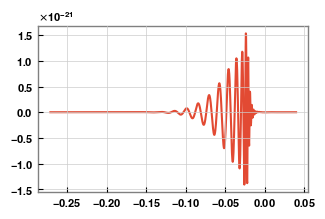

In [6]:
plt.plot(injection.times, injection)

In [7]:
likelihood = TimeDomainLikelihood(data=injection,
                                  psd=FlatPSD(),
                                  detector=AdvancedLIGOHanford(),
                                  waveform=IMRPhenomPv2(),
)                                  

{'m1': 10, 'm2': <Quantity 20. solMass>, 'distance': <Quantity 500. Mpc>, 'inclination': 0, 'f_min': <Quantity 100. Hz>, 'f_ref': <Quantity 300. Hz>, 'theta_jn': 0, 'phase': 0}


np.float64(1.929141386219777e+18)

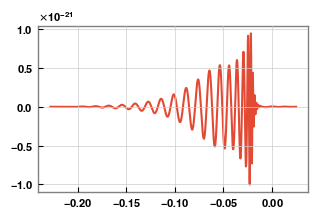

In [8]:
loc.update({"m1": 10})
test = test_waveform.time_domain(loc).project(detector=AdvancedLIGOHanford(), **position)
plt.plot(test.times, test)
print(loc)
likelihood.log_likelihood(test)

-0.207763672 0.000244140625
[-2.07763672e+08 -2.07763672e+08 -2.07763672e+08 ...
 -2.07763672e+08 -2.07763672e+08 -2.07763672e+08]
-0.208007812 0.000244140625
[-2.08007812e+08 -2.08007812e+08 -2.08007812e+08 ...
 -2.08007812e+08 -2.08007812e+08 -2.08007812e+08]
-0.208496094 0.000244140625
[-2.08496094e+08 -2.08496094e+08 -2.08496094e+08 ...
 -2.08496094e+08 -2.08496094e+08 -2.08496094e+08]
-0.208496093 0.000244140625
[-2.08496093e+08 -2.08496093e+08 -2.08496093e+08 ...
 -2.08496093e+08 -2.08496093e+08 -2.08496093e+08]
-0.208984375 0.000244140625
[-2.08984375e+08 -2.08984375e+08 -2.08984375e+08 ...
 -2.08984375e+08 -2.08984375e+08 -2.08984375e+08]
-0.209472656 0.000244140625
[-2.09472656e+08 -2.09472656e+08 -2.09472656e+08 ...
 -2.09472656e+08 -2.09472656e+08 -2.09472656e+08]
-0.209960938 0.000244140625
[-2.09960938e+08 -2.09960938e+08 -2.09960938e+08 ...
 -2.09960938e+08 -2.09960938e+08 -2.09960938e+08]
-0.210205077 0.000244140625
[-2.10205077e+08 -2.10205077e+08 -2.10205077e+08 ...
 -

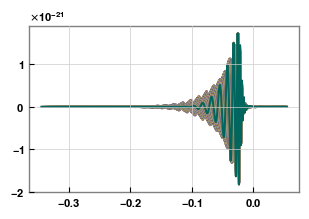

In [14]:
widths = np.linspace(10, 30, 100)
likelihoods = []
f, ax = plt.subplots(1,1)
for w in widths:
    loc.update(position)
    loc.update({"m1": w})
    test = test_waveform.time_domain(loc).project(detector=AdvancedLIGOHanford(), **loc)
    ax.plot(test)
    likelihoods.append(
        likelihood(loc)
        )

In [16]:
likelihoods

[np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.float64(623.4782600697467),
 np.floa